In [5]:
import os
import pickle
from glob import glob

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib import font_manager
from matplotlib.colors import LogNorm

In [75]:
par_pickle_filename = '../cdi.par.pickle'
with open(par_pickle_filename, 'rb') as f:
    parameters = pickle.load(f)

sim_units_pickle_filename = '../sim_units.pickle'
with open(sim_units_pickle_filename, 'rb') as f:
    sim_units = pickle.load(f)

data_folder = '/Users/jsn/landing/data/'
latest_run_folder = sorted(glob(os.path.join(data_folder,'cdi_*')))[-1]
planet_data_path = os.path.join(latest_run_folder,'planet0.dat')

planet = {'i':[],
          'x':[],
          'y':[],
          'z':[],
          'vx':[],
          'vy':[],
          'vz':[],
          'mass':[],
          'time':[],
          'frame_rotation':[]
         }
with open(planet_data_path) as f:
    for line in f:
        l = [float(el) for el in line.split()]
        planet['i'].append(l[0])
        planet['x'].append(l[1]*sim_units['length'])
        planet['y'].append(l[2]*sim_units['length'])
        planet['z'].append(l[3]*sim_units['length'])
        planet['vx'].append(l[4]*sim_units['length']/sim_units['time'])
        planet['vy'].append(l[5]*sim_units['length']/sim_units['time'])
        planet['vz'].append(l[6]*sim_units['length']/sim_units['time'])
        planet['mass'].append(l[7]*sim_units['mass'])
        planet['time'].append(l[8]*sim_units['time'])
        planet['frame_rotation'].append(l[9])
        
orbit_data_path = os.path.join(latest_run_folder,'orbit0.dat')
orbit = {'time':[],
         'ecc':[],
         'a':[],
         'mean_anomaly':[],
         'true_anomaly':[],
         'arg_periastron':[],
         'rotation':[],
         'inclination':[],
         'lon_asc_node':[],
         'pa_perihelion':[]
        }
        
with open(orbit_data_path) as f:
    for line in f:
        l = [float(el) for el in line.split()]
        orbit['time'].append(l[0])
        orbit['ecc'].append(l[1])
        orbit['a'].append(l[2])
        orbit['mean_anomaly'].append(l[3])
        orbit['true_anomaly'].append(l[4])
        orbit['arg_periastron'].append(l[5])
        orbit['rotation'].append(l[6])
        orbit['inclination'].append(l[7])
        orbit['lon_asc_node'].append(l[8])
        orbit['pa_perihelion'].append(l[9]) 

Latest run folder -> /Users/jsn/landing/data/cdi_0056


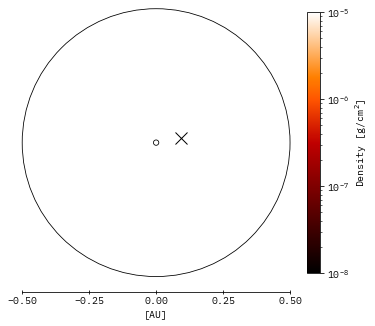

In [76]:
data_folder = '/Users/jsn/landing/data/'
latest_run_folder = sorted(glob(os.path.join(data_folder,'cdi_*')))[-1]

print('Latest run folder -> {}'.format(latest_run_folder))

data_files = glob(os.path.join(latest_run_folder,'gasdens*.dat'))

for el in data_files:
    if 'gasdens0_2d.dat' in el:
        data_files.remove(el)

#for i in range(len(data_files)):
i = 10
data_filename = 'gasdens{}.dat'.format(i)
data_path = os.path.join(latest_run_folder, data_filename)

planet_coords = (planet['x'][i], planet['y'][i])
phi, r, density = read_fargo_data(data_path, parameters, sim_units)
fig, img = plot_disk(r, phi, density, planet_coords)

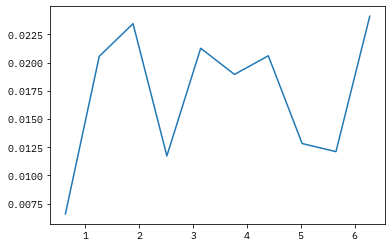

In [77]:
plt.plot(orbit['time'], orbit['ecc'])
plt.show()


In [462]:
kb = 3.23236e-58
G = 0.03763
sigma_stefan = 9.36927e-13
r_h = 0.5
mu = 2.072e-54
mass_accretion = 1e-7 


aa = kb / (G*planet_mass*mu)
bb = 3*G * planet_mass * mass_accretion / (8*np.pi*sigma_stefan)

coeff = np.sqrt(aa)*np.power(bb, 1/8)
print(coeff)

0.1392793109539093


In [463]:
def aspect_ratio(r, coeff):
    r_h = 0.5
    return coeff*np.power(r*(np.sqrt(r_h/r) - 1), 1/8)


[0.09812841 0.10015676 0.10154761 0.10258553 0.10339876 0.10405615
 0.10459901 0.10505402 0.10543945 0.10576831 0.10605023 0.10629251
 0.1065008  0.10667959 0.10683249 0.10696242 0.10707182 0.10716271
 0.10723677 0.10729547 0.10734002 0.1073715  0.1073908  0.10739874
 0.10739599 0.10738317 0.10736081 0.10732936 0.10728925 0.10724082
 0.1071844  0.10712026 0.10704865 0.10696978 0.10688384 0.10679098
 0.10669134 0.10658503 0.10647216 0.10635279 0.10622698 0.10609479
 0.10595622 0.1058113  0.10566002 0.10550237 0.1053383  0.10516777
 0.10499073 0.10480709 0.10461676 0.10441965 0.10421562 0.10400455
 0.10378628 0.10356064 0.10332743 0.10308646 0.10283749 0.10258026
 0.1023145  0.10203991 0.10175615 0.10146286 0.10115964 0.10084605
 0.10052161 0.10018581 0.09983805 0.0994777  0.09910405 0.09871634
 0.09831369 0.09789514 0.09745962 0.09700593 0.09653271 0.09603844
 0.09552137 0.09497952 0.09441062 0.09381202 0.09318065 0.09251291
 0.09180452 0.09105035 0.09024417 0.08937834 0.08844329 0.0874

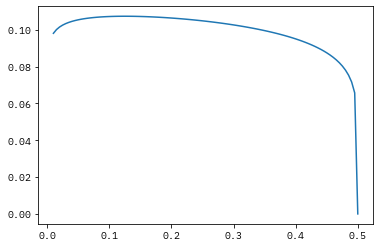

In [464]:
r = np.linspace(0.01, 0.5, 100)
planet_mass = 1
mass_accretion = 1e-7 
#mass_accretion = 1e-7 * 5e5

ar = aspect_ratio(r, 0.1392793109539093)
plt.plot(r, ar)
#plt.xscale('log')
#plt.yscale('log')

print(ar)

In [525]:
def coeff():
    kb = 3.23236e-58
    G = 0.03763
    sigma_stefan = 9.36927e-13
    r_h = 0.5
    mu = 2.072e-54
    
    #kb = 1
    #G = 1
    #planet_mass = 1
    #mu = 1
    #r_h = 0.5
    #sigma_stefan = 29895.848737

    a = kb / (G*planet_mass*mu)
    b = 3*G * planet_mass * mass_accretion / (8*np.pi*sigma_stefan)
    print(a,b)
    return np.sqrt(a) * np.power(b, 1/8)

In [526]:
coeff()

0.0041456797901124245 479.41305794485754


0.1392793109539093

In [568]:
def coeff():
    unit_length = 1
    unit_G = 0.03763
    unit_mass = 1
    unit_time = np.sqrt(unit_length**3 / (unit_G*unit_mass)) # years per 2pi period

    G = 1
    mass_accretion = 1e-7 / (unit_mass/unit_time)
    planet_mass = 1
    kb_mu = 0.95
    mu = 1
    sigma_stefan = 29895.848737

    a = kb_mu / (G*planet_mass)
    b = 3*G * planet_mass * mass_accretion / (8*np.pi*sigma_stefan)
    print(a,b)
    return np.sqrt(a) * np.power(b, 1/8)  


In [564]:
coeff()

0.95 7.745288812775545e-14


0.02238677347218799

/var/folders/6y/p7j56dj17hj87w_r01qjgv480000gn/T/ipykernel_2260/1258555226.py:25: RuntimeWarning: divide by zero encountered in true_divide
  rho = (mass_accretion / (3.0*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1.0) * 8481.55
/var/folders/6y/p7j56dj17hj87w_r01qjgv480000gn/T/ipykernel_2260/1258555226.py:25: RuntimeWarning: invalid value encountered in multiply
  rho = (mass_accretion / (3.0*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1.0) * 8481.55


[0.08822519 0.09265681 0.09490336 0.09637918 0.09745595 0.09828789
 0.09895404 0.09950032 0.0999558  0.10034004 0.1006668  0.10094616
 0.10118568 0.10139121 0.10156733 0.10171772 0.10184537 0.10195271
 0.10204179 0.10211431 0.10217172 0.10221526 0.10224597 0.10226477
 0.10227244 0.10226968 0.10225707 0.10223515 0.10220437 0.10216513
 0.10211779 0.10206266 0.10200001 0.10193008 0.10185307 0.10176917
 0.10167853 0.10158128 0.10147753 0.10136738 0.10125089 0.10112811
 0.1009991  0.10086386 0.10072241 0.10057474 0.10042082 0.10026062
 0.1000941  0.09992117 0.09974178 0.09955581 0.09936316 0.09916371
 0.09895731 0.0987438  0.09852302 0.09829476 0.0980588  0.09781491
 0.09756283 0.09730227 0.09703291 0.09675441 0.0964664  0.09616845
 0.09586011 0.09554088 0.09521022 0.09486751 0.09451208 0.0941432
 0.09376004 0.09336169 0.09294712 0.09251519 0.0920646  0.0915939
 0.09110144 0.09058531 0.09004335 0.08947305 0.08887147 0.08823518
 0.08756008 0.0868413  0.08607289 0.08524757 0.0843562  0.083387

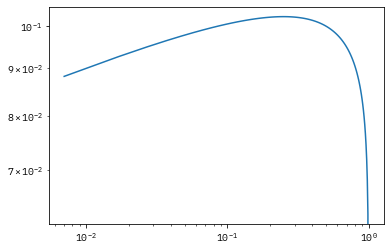

In [592]:
kb = 3.23236e-58
G = 0.03763
sigma_stefan = 9.36927e-13
r_h = 0.3381
mu = 2.072e-54
def aspect_ratio(r, planet_mass, mass_accretion):
    a = kb / (G*planet_mass*mu)
    b = 3*G * planet_mass * mass_accretion * r / (8*np.pi*sigma_stefan)
    c = np.sqrt(r_h / r) - 1
    return np.sqrt(a * np.power(b * c, 1/4))

r = np.linspace(0.007*r_h, r_h, 100)
planet_mass = 1
mass_accretion = 1e-7 
omega = np.sqrt(G*planet_mass/r/r/r);


ar = aspect_ratio(r, planet_mass, mass_accretion)

h = ar*r
soundspeed = h/omega;

alpha = 0.001
viscosity = alpha*soundspeed*h;
rho = (mass_accretion / (3.0*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1.0) * 8481.55 

plt.plot(r/r_h, ar)
plt.xscale('log')
plt.yscale('log')
print(ar)

print(rho)

[0.08166274 0.08335075 0.08450822 0.08537198 0.08604874 0.08659583
 0.0870476  0.08742626 0.08774701 0.08802069 0.08825531 0.08845693
 0.08863027 0.08877907 0.08890631 0.08901444 0.08910548 0.08918111
 0.08924275 0.0892916  0.08932868 0.08935487 0.08937094 0.08937754
 0.08937526 0.08936459 0.08934597 0.08931981 0.08928642 0.08924612
 0.08919917 0.08914579 0.0890862  0.08902056 0.08894904 0.08887176
 0.08878884 0.08870037 0.08860644 0.0885071  0.0884024  0.08829239
 0.08817708 0.08805647 0.08793058 0.08779937 0.08766284 0.08752092
 0.08737359 0.08722076 0.08706237 0.08689833 0.08672854 0.08655289
 0.08637124 0.08618346 0.08598939 0.08578885 0.08558165 0.08536759
 0.08514642 0.08491791 0.08468176 0.08443769 0.08418534 0.08392437
 0.08365438 0.08337492 0.08308551 0.08278563 0.08247468 0.08215202
 0.08181694 0.08146862 0.08110618 0.08072862 0.0803348  0.07992347
 0.07949316 0.07904223 0.07856879 0.07807063 0.07754521 0.07698951
 0.07639999 0.07577236 0.07510146 0.07438091 0.07360276 0.0727

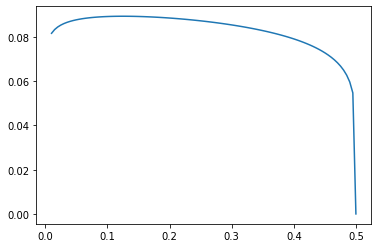

In [196]:
def aspect_ratio(r, planet_mass, mass_accretion):
    #kb = 3.23236e-58
    #G = 0.03763
    #sigma_stefan = 9.36927e-13
    #r_h = 0.5
    #mu = 2.072e-54
    
    G = 1
    G = 0.03763
    planet_mass = 1
    kb = 0.95
    mu = 1
    r_h = 0.5
    sigma_stefan = 29895.848737

    a = kb / (G*planet_mass*mu)
    b = 3*G * planet_mass * mass_accretion * r / (8*np.pi*sigma_stefan)
    c = np.sqrt(r_h / r) - 1
    return np.sqrt(a * np.power(b * c, 1/4))


length = 1
G = 0.03763
mass = 1
time_unit = np.sqrt(length**3 / (G*mass)) # years per 2pi period

r = np.linspace(0.01, 0.5, 100)
planet_mass = 1
mass_accretion = 1e-7 / (planet_mass / time_unit)
#mass_accretion = 1e-7 * 5e5

ar = aspect_ratio(r, planet_mass, mass_accretion)
plt.plot(r, aspect_ratio(r, planet_mass, mass_accretion))
#plt.xscale('log')
#plt.yscale('log')

print(ar)

In [194]:
xs = []
ys = []
with open('../out.txt', 'r') as f:
    for line in f:
        try:
            l = [float(el) for el in line.split()]
        except:
            continue
        xs.append(l[0])
        ys.append(l[1])

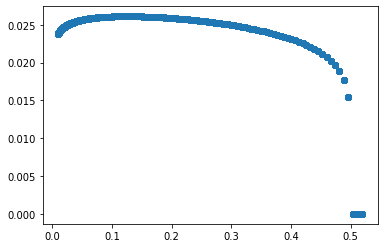

In [195]:
plt.plot(xs,ys, marker='o', linestyle='none')

[0.08757077 0.09222329 0.09452324 0.0960222  0.09711153 0.09795121
 0.0986225  0.09917242 0.09963058 0.10001686 0.10034523 0.10062589
 0.10086648 0.10107292 0.10124982 0.1014009  0.10152915 0.10163705
 0.10172664 0.10179965 0.10185752 0.10190149 0.10193262 0.10195183
 0.10195991 0.10195755 0.10194534 0.10192382 0.10189343 0.1018546
 0.10180767 0.10175295 0.10169072 0.10162121 0.10154464 0.10146118
 0.10137099 0.10127421 0.10117093 0.10106125 0.10094525 0.10082298
 0.10069448 0.10055977 0.10041885 0.10027173 0.10011838 0.09995876
 0.09979283 0.09962051 0.09944174 0.09925641 0.09906442 0.09886564
 0.09865993 0.09844713 0.09822707 0.09799956 0.09776437 0.09752127
 0.09726999 0.09701026 0.09674176 0.09646415 0.09617704 0.09588003
 0.09557266 0.09525443 0.0949248  0.09458315 0.09422883 0.09386109
 0.09347911 0.09308199 0.09266869 0.09223808 0.09178887 0.09131961
 0.09082865 0.09031409 0.08977378 0.08920521 0.08860546 0.08797109
 0.08729804 0.08658143 0.08581534 0.0849925  0.08410382 0.08313

(0.03, 0.3)

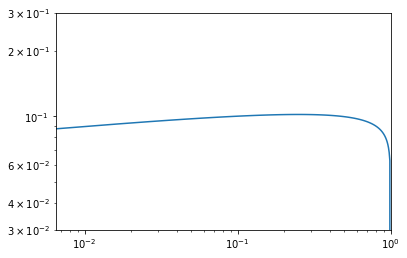

In [226]:
# dimensionless

unit_length = 1
unit_G = 0.03763
unit_mass = 1
unit_time = np.sqrt(unit_length**3 / (unit_G*unit_mass)) # years per 2pi period

kb_mu = 0.95
G = 1
M = 1
Mdot = 1e-7 / (unit_mass / unit_time)

R_MU_CGS = 36149835.0
G_CGS =  6.67430e-8
MSTAR_CGS = 1.899e+30
R0_CGS = 1.496e+13
stefans_constant = 5.6705e-5/ (np.power(R_MU_CGS,4.0)*np.power(G_CGS,-2.5)*np.power(MSTAR_CGS,-1.5)*np.power(R0_CGS,-0.5))

r_j = 0.0004673296

r_h = 5.2 * np.power(M / (3*M*1000), 1/3)
r_t = 5*r_j

r = np.linspace(r_t, r_h, 100)

a = kb_mu / (G*M)
b = 3*G * M * Mdot * r / (8*np.pi*sigma_stefan)
c = np.sqrt(r_h / r) - 1
ar = np.sqrt(a * np.power(b * c, 1/4))
print(ar)

plt.plot(r/r_h,ar)
plt.xscale('log')
plt.yscale('log')
plt.xlim(r_t/r_h, 1)
plt.ylim(0.03, 0.3)

In [220]:
sigma_stefan

0.38677966268737957

In [180]:
g_to_MJ = 5.26704e-31
cm_to_AU = 6.6846e-14
sec_to_year = 3.17098e-8

kb = 1.380649e-16
G = 6.67430e-8
mu = 2.0 # g/mol
M = 1/g_to_MJ
Mdot = 6.02e15 # g/sec
sigma_stefan = 5.6704e-5
N = 6.022e23

r_j = 6.99115e9 # jupiter radius in cm

r_h = 5.2 * np.power(M / (3*M*1000), 1/3) /cm_to_AU
r_t = 5*r_j
r = np.linspace(r_t, r_h, 100)

a = kb / (G*M*mu) * N
b = 3*G * M * Mdot * r / (8*np.pi*sigma_stefan)
c = np.sqrt(r_h / r) - 1
ar = np.sqrt(a * np.power(b * c, 1/4))

In [192]:
h = ar*r
omega = np.sqrt(G*M / np.power(r, 3))
soundspeed = h*omega

alpha = 1e-4
viscosity = alpha*soundspeed*h

density = (Mdot / (3*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1)

/var/folders/6y/p7j56dj17hj87w_r01qjgv480000gn/T/ipykernel_863/1288780931.py:8: RuntimeWarning: divide by zero encountered in true_divide
  density = (Mdot / (3*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1)
/var/folders/6y/p7j56dj17hj87w_r01qjgv480000gn/T/ipykernel_863/1288780931.py:8: RuntimeWarning: invalid value encountered in multiply
  density = (Mdot / (3*np.pi*viscosity)) * (np.sqrt(r_h/r) - 1)


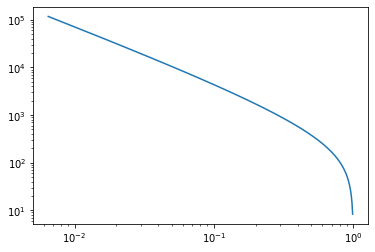

In [193]:
plt.plot(r/r_h,density)
plt.xscale('log')
plt.yscale('log')

(0.03, 0.3)

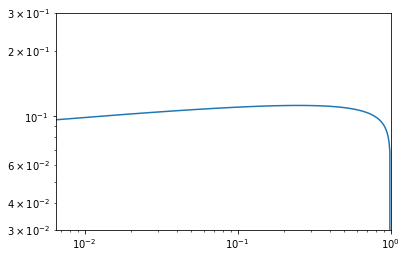

In [175]:
plt.plot(r/r_h,ar)
plt.xscale('log')
plt.yscale('log')
plt.xlim(r_t/r_h, 1)
plt.ylim(0.03, 0.3)